# **Global COVID-19 Data Analysis**

## Project Objective
This project analyzes global COVID-19 data from Our World in Data to explore pandemic trends, country-level impacts, and the relationship between socio-economic indicators and COVID-19 outcomes. 

The goal is to provide a clean, well-structured dataset and a visually rich exploratory analysis that can highlight key insights for portfolio presentation.

## Dataset
The dataset includes:
- **Location** (country name)
- **Date** (daily records)
- **Total Cases** (cumulative COVID-19 cases)
- **Total Deaths** (cumulative COVID-19 deaths)
- **Gdp Per Capita** (economic indicator)
- **Human Development Index** (development indicator)

In [40]:
import pandas as pd

### **Loading the COVID-19 Dataset**

The raw COVID-19 data is imported from a CSV file into a **pandas DataFrame**, which allows for efficient data manipulation and analysis. The dataset contains **country-level daily statistics** including COVID-19 cases, deaths, and socio-economic indicators. 

Displaying the DataFrame provides an initial view of the structure, helping to identify:
- **Missing values** in fields like GDP per capita and HDI
- **Aggregate rows** such as "International" without a specific country
- Opportunities for **data cleaning and preprocessing** before analysis

In [41]:
df_covid = pd.read_csv("owid-covid-data.csv")
df_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44780,NaN,NaN,International,2020-09-15,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44781,NaN,NaN,International,2020-09-16,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44782,NaN,NaN,International,2020-09-17,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44783,NaN,NaN,International,2020-09-18,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Selecting Relevant Columns**

From the original **41 columns**, only six are retained for focused analysis:
- `location` – country name  
- `date` – daily record  
- `total_cases` – cumulative COVID-19 cases  
- `total_deaths` – cumulative COVID-19 deaths  
- `gdp_per_capita` – economic indicator  
- `human_development_index` – development indicator  

This step **simplifies the dataset**, reduces processing complexity, and ensures we focus on the **most critical health and socio-economic metrics** for the analysis.

In [42]:
cols = ["location", "date", "total_cases",
        "total_deaths","gdp_per_capita", "human_development_index"]

df_covid = df_covid[cols]

### **Previewing the Dataset**

Displaying the filtered DataFrame provides a **quick snapshot** of the cleaned dataset. It allows us to:
- Verify that the **relevant columns** have been correctly retained  
- Inspect the **data types and values**  
- Identify any **immediate issues**, such as missing values or inconsistencies, before proceeding with further cleaning and analysis

In [43]:
df_covid

,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498
1,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498
2,Afghanistan,2020-01-02,0.0,0.0,1803.987,0.498
3,Afghanistan,2020-01-03,0.0,0.0,1803.987,0.498
4,Afghanistan,2020-01-04,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...
44780,International,2020-09-15,696.0,7.0,NaN,NaN
44781,International,2020-09-16,696.0,7.0,NaN,NaN
44782,International,2020-09-17,696.0,7.0,NaN,NaN
44783,International,2020-09-18,696.0,7.0,NaN,NaN


### **Inspecting Data Types**

Checking the **data types** of each column ensures that the dataset is ready for analysis. Observations include:  
- `location` is an **object** (string), representing country names  
- `date` is currently an **object**, which will need conversion to **datetime** for time-series analysis  
- `total_cases`, `total_deaths`, `gdp_per_capita`, and `human_development_index` are **float64**, suitable for numerical computations  

This step helps identify **necessary preprocessing actions**, such as converting the `date` column to datetime format.


In [44]:
df_covid.dtypes

location                    object
date                        object
total_cases                float64
total_deaths               float64
gdp_per_capita             float64
human_development_index    float64
dtype: object

### **Converting `date` to Datetime**

The `date` column is converted from an object (string) to **datetime format**. This is essential for:  
- Performing **time-series analysis**  
- Sorting and filtering data by date  
- Plotting trends over time accurately  

Using datetime ensures that all subsequent operations on the `date` column are **efficient and reliable**.


In [45]:
df_covid["date"] = pd.to_datetime(df_covid["date"])

C:\Users\Mazen\AppData\Local\Temp\ipykernel_7476\3535977279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid["date"] = pd.to_datetime(df_covid["date"])


### **Verifying Data Type Conversion**

After converting the `date` column, the DataFrame now has the following types:  
- `location`: **object**  
- `date`: **datetime64[ns]**  
- `total_cases`, `total_deaths`, `gdp_per_capita`, `human_development_index`: **float64**  

This confirms that the dataset is **properly formatted for time-series analysis** and numerical computations.


In [46]:
df_covid.dtypes

location                           object
date                       datetime64[ns]
total_cases                       float64
total_deaths                      float64
gdp_per_capita                    float64
human_development_index           float64
dtype: object

### **Checking for Missing Values**

Identifying missing values is crucial for **data quality** and analysis reliability. The initial inspection shows:  
- `human_development_index`: **6,227 missing values**  
- `gdp_per_capita`: **5,343 missing values**  
- `total_cases` and `total_deaths`: **603 missing values each**  
- `location` and `date`: **no missing values**  

This highlights that **socio-economic indicators** have significant gaps, which will need careful handling to avoid biased analysis, while missing health outcome data may require **row removal**.


In [47]:
df_covid.isnull().sum().sort_values(ascending=False)

human_development_index    6227
gdp_per_capita             5343
total_cases                 603
total_deaths                603
location                      0
date                          0
dtype: int64

### **Calculating Missing Value Percentages**

This function computes the **percentage of missing values** for each column, providing a clearer understanding of the dataset's completeness. By expressing missing data as a percentage rather than raw counts, we can make **better-informed decisions** on how to handle gaps—whether by **dropping rows**, **filling with a statistic**, or **imputing values** based on other logic.

In [48]:
def null_percentage(df_covid):
        for column in df_covid.columns:
            percentage = df_covid[column].isnull().mean() * 100
            print(column + ":", str(percentage.round(2)) + "%")

### **Missing Value Overview**

Applying the `null_percentage` function shows the proportion of missing data in each column:  
- `location` and `date`: **0% missing**  
- `total_cases` and `total_deaths`: **~1.35% missing**, relatively small but critical for analysis  
- `gdp_per_capita`: **~11.93% missing**  
- `human_development_index`: **~13.9% missing**  

This confirms that **socio-economic indicators** have substantial gaps, which will require **imputation**, while missing case and death data may need **row removal** to maintain data integrity.


In [49]:
null_percentage(df_covid)

location: 0.0%
date: 0.0%
total_cases: 1.35%
total_deaths: 1.35%
gdp_per_capita: 11.93%
human_development_index: 13.9%


### **Handling Missing Values in Critical Columns**

Rows with missing `total_cases` or `total_deaths` are dropped because these are **key metrics** for analyzing COVID-19 impact. Removing these rows ensures that subsequent calculations, visualizations, and insights are based on **complete and reliable health outcome data**.


In [50]:
df_covid = df_covid.dropna(subset=["total_cases", "total_deaths"])

### **Post-Cleaning Missing Value Check**

After dropping rows with missing case or death data:  
- `total_cases` and `total_deaths` now have **0% missing values**, ensuring reliable analysis for COVID-19 outcomes.  
- Missing percentages for `gdp_per_capita` (~12%) and `human_development_index` (~14%) remain, indicating that **socio-economic data still requires imputation** before further analysis.  

This step confirms that the dataset is **clean for core health metrics** while highlighting where additional handling is needed.

In [51]:
null_percentage(df_covid)

location: 0.0%
date: 0.0%
total_cases: 0.0%
total_deaths: 0.0%
gdp_per_capita: 12.03%
human_development_index: 13.99%


### **Imputing Socio-Economic Missing Values**

Missing values in `gdp_per_capita` and `human_development_index` are filled using their **mode** (most frequent value). This approach:  
- Maintains the **overall distribution** of the dataset  
- Prevents loss of rows due to missing socio-economic data  
- Ensures that subsequent **correlation and trend analyses** are not affected by null values  

Using mode imputation is a simple yet effective strategy for **categorical-like or skewed numerical variables** where median or mean may not be ideal.


In [52]:
mode = df_covid["gdp_per_capita"].mode()[0]

df_covid.fillna({"gdp_per_capita": mode}, inplace=True)

mode = df_covid["human_development_index"].mode()[0]

df_covid.fillna({"human_development_index": mode}, inplace=True)

C:\Users\Mazen\AppData\Local\Temp\ipykernel_7476\3618940639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid.fillna({"gdp_per_capita": mode}, inplace=True)
C:\Users\Mazen\AppData\Local\Temp\ipykernel_7476\3618940639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid.fillna({"human_development_index": mode}, inplace=True)


### **Final Check for Missing Values**

After imputing missing socio-economic data, all columns now have **0% missing values**. The dataset is fully complete, making it **ready for exploratory data analysis and visualization** without concerns about null-related errors or biases.


In [53]:
null_percentage(df_covid)

location: 0.0%
date: 0.0%
total_cases: 0.0%
total_deaths: 0.0%
gdp_per_capita: 0.0%
human_development_index: 0.0%


### **Checking for Duplicates**

The dataset is checked for **duplicated rows**, which could distort analysis or visualizations. No duplicates are found, confirming that each row represents a **unique country-date record**, ensuring data integrity for subsequent analysis.

In [54]:
df_covid[df_covid.duplicated()] # No duplicated values

,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index


### **Renaming Columns for Readability**

Column names are reformatted to be **cleaner and more readable** by:  
- Replacing underscores `_` with spaces  
- Converting to **Title Case**  

This improves **clarity in visualizations, tables, and reports**, making the dataset easier to interpret and present in the portfolio. The final columns are:  
- `Location`  
- `Date`  
- `Total Cases`  
- `Total Deaths`  
- `Gdp Per Capita`  
- `Human Development Index`

In [55]:
df_covid.columns = df_covid.columns.str.replace("_", " ")
df_covid.columns = df_covid.columns.str.title()
df_covid.columns

Index(['Location', 'Date', 'Total Cases', 'Total Deaths', 'Gdp Per Capita',
       'Human Development Index'],
      dtype='object')

### **Previewing the Cleaned Dataset**

Displaying the cleaned DataFrame provides a **snapshot of the dataset after preprocessing**. Key observations:  
- The dataset contains **44,182 rows and 6 columns**  
- Columns are **clean, readable, and ready for analysis**  
- Missing values have been handled, and there are **no duplicates**  
- Aggregate rows like "International" are still present, which can be **filtered if country-specific analysis** is required  

This confirms that the dataset is **well-prepared for exploratory data analysis and visualization**.


In [56]:
df_covid

,Location,Date,Total Cases,Total Deaths,Gdp Per Capita,Human Development Index
0,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498
1,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498
2,Afghanistan,2020-01-02,0.0,0.0,1803.987,0.498
3,Afghanistan,2020-01-03,0.0,0.0,1803.987,0.498
4,Afghanistan,2020-01-04,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...
44780,International,2020-09-15,696.0,7.0,14103.452,0.757
44781,International,2020-09-16,696.0,7.0,14103.452,0.757
44782,International,2020-09-17,696.0,7.0,14103.452,0.757
44783,International,2020-09-18,696.0,7.0,14103.452,0.757


### **Calculating Case Fatality Rate (CFR) for All Countries**

Here, we calculate the **Case Fatality Rate (CFR)** for each country

Steps:
1. `df_latest` is created by taking the **most recent record** for each country (`groupby("Location").last()`), ensuring that we use **up-to-date cumulative data**.
2. The CFR is calculated for each country and stored in a new column `"CFR %"`.
3. Values are rounded to **two decimal places** for easier readability.

**Purpose & Insights:**
- CFR provides a **proportional measure of mortality relative to confirmed cases**, which is more informative than just looking at total deaths.
- High CFR indicates **higher risk of death among detected cases**, often reflecting **healthcare system capacity, population vulnerability, and testing/reporting accuracy**.
- Comparing CFR across countries allows us to **identify regions with particularly severe outcomes**, beyond just raw case counts.


In [57]:
df_latest = df_covid.sort_values("Date").groupby("Location").last()

In [58]:
df_latest["CFR %"] = ((df_latest["Total Deaths"] / df_latest["Total Cases"]) * 100).round(2)

In [59]:
df_latest

,Date,Total Cases,Total Deaths,Gdp Per Capita,Human Development Index,CFR %
Location,,,,,,
Afghanistan,2020-09-19,38919.0,1437.0,1803.987,0.498,3.69
Albania,2020-09-19,12073.0,353.0,11803.431,0.785,2.92
Algeria,2020-09-19,49413.0,1659.0,13913.839,0.754,3.36
Andorra,2020-09-19,1564.0,53.0,14103.452,0.858,3.39
Angola,2020-09-19,3789.0,144.0,5819.495,0.581,3.80
...,...,...,...,...,...,...
Western Sahara,2020-09-19,766.0,1.0,14103.452,0.757,0.13
World,2020-09-19,30540446.0,952724.0,15469.207,0.757,3.12
Yemen,2020-09-19,2024.0,585.0,1479.147,0.452,28.90


### **Top 10 Countries by COVID-19 Case Fatality Rate (CFR %) and Comparison with Global Average**

This analysis identifies the **top 10 countries with the highest CFR %**, providing insight into where COVID-19 was **most deadly relative to reported cases**.

**Key Observations:**
- **Yemen** has the highest CFR at **28.90%**, which is **over 11 times higher** than the global average CFR of **2.55%**.  
- Other countries in the top 10, including **Italy (12.09%)**, **United Kingdom (10.81%)**, and **Mexico (10.57%)**, also significantly exceed the global average.  
- Countries like **France (7.29%)** and **Isle of Man (7.08%)** still show elevated CFRs compared to the world mean.  

**Insights:**
- A high CFR indicates a **higher proportion of deaths among confirmed cases**, which may result from:
  - **Healthcare system limitations or overload**  
  - **Delayed detection or limited testing**, causing milder cases to be underreported  
  - **Population vulnerability**, e.g., older populations or comorbidities  
  - **Data accuracy and reporting practices**  

- Comparing top CFRs with the **global average (2.55%)** highlights stark **regional disparities in pandemic impact**, emphasizing that some countries suffered disproportionately high mortality even with relatively fewer cases.

**Conclusion:**
- While total case counts show **where infections were widespread**, CFR provides complementary insight into **severity and mortality risk**.  
- Countries in the top 10 CFR list require particular attention in terms of **public health response, resource allocation, and historical analysis of healthcare outcomes** during the pandemic.

In [60]:
df_cfr = df_latest[["Total Cases", "Total Deaths", "CFR %"]].sort_values(by="CFR %", ascending=False).head(10)
df_cfr

,Total Cases,Total Deaths,CFR %
Location,,,
Yemen,2024.0,585.0,28.90
Italy,294932.0,35668.0,12.09
United Kingdom,385936.0,41732.0,10.81
Mexico,688954.0,72803.0,10.57
Belgium,99555.0,9937.0,9.98
Ecuador,124129.0,11044.0,8.90
Jersey,393.0,32.0,8.14
Montserrat,13.0,1.0,7.69
France,428696.0,31249.0,7.29


In [61]:
global_cfr_avg = df_latest["CFR %"].mean().round(2)
print("Global Average CFR:", global_cfr_avg, "%") # Global Average CFR: 2.55 %

Global Average CFR: 2.55 %


---

### **Exploratory Data Analysis**

With the dataset now **cleaned and structured**, we can explore patterns and trends through **visualizations**. This section focuses on:  
- **Time-series analysis** of COVID-19 cases and deaths  
- **Comparisons across countries**  
- **Correlation between socio-economic indicators** and pandemic outcomes  

The goal is to uncover **insights that reveal how COVID-19 spread and its impact varied globally**.

### **COVID-19 Cases and Deaths in Poland (March – September 2020)**

The time-series visualization of Poland’s COVID-19 trajectory between **March 4, 2020, and September 19, 2020** reveals several important patterns:

- **Early Stage (March 4 – mid-March 2020):**  
  - The first confirmed case appeared on **March 4, 2020**, with only **1 infection**.  
  - Cases grew gradually through early March, surpassing **100 cases by March 15**, while deaths remained very low, with only isolated fatalities.

- **Acceleration Phase (late March – April 2020):**  
  - A sharp rise in cases began around **mid-to-late March**, crossing **1,000 cases by March 26** and **10,000 by late April**.  
  - Deaths also increased, though at a slower pace, reaching **over 400 by late April**.  
  - This widening gap between cases and deaths suggests that although the virus spread rapidly, the case-fatality rate remained relatively controlled.

- **Steady Growth (May – July 2020):**  
  - Poland experienced **consistent but moderate daily increases**, with cumulative cases rising steadily from **~20,000 in late May** to **~40,000 by late July**.  
  - Deaths followed a similar gradual trend, reaching **~1,600 by late July**, showing stability in mortality despite the rising infections.

- **Renewed Surge (August – September 2020):**  
  - From August onwards, cases climbed more quickly, surpassing **70,000 infections by early September**.  
  - Deaths continued increasing but at a slower rate, with totals around **2,200 by mid-September**, indicating that while transmission accelerated, mortality growth was less steep.

### **Key Insights**
- Poland’s first wave was **delayed and moderate compared to Western Europe**, with slower initial growth.  
- The gap between cases and deaths widened over time, pointing to **relatively effective healthcare response or demographic factors (younger population, fewer comorbidities)**.  
- By September 2020, the data clearly showed the **onset of a second surge**, foreshadowing a more challenging phase of the pandemic.  
- The country’s trajectory highlights how **early containment delayed the crisis**, but sustained spread eventually caught up, similar to patterns in other Central and Eastern European nations.

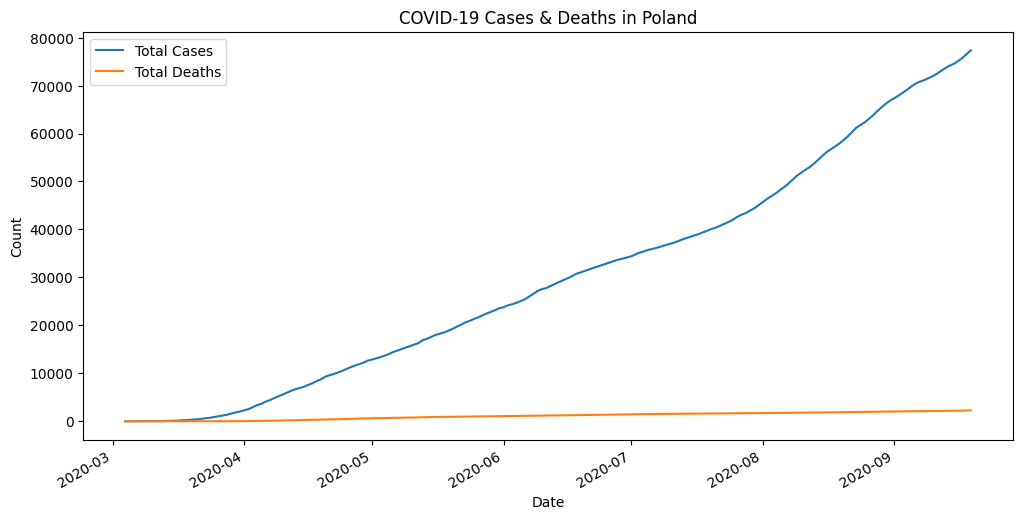

In [62]:
df_country = df_covid[df_covid["Location"] == "Poland"].sort_values("Date")

ax = df_country.set_index("Date")["Total Cases"].plot(kind="line", figsize=(12,6),
                                                      ylabel="Count", label="Total Cases",
                                                      title="COVID-19 Cases & Deaths in Poland")

df_country.set_index("Date")["Total Deaths"].plot(kind="line", label="Total Deaths", ax=ax)

ax.legend()

### **COVID-19 in Italy: Cases and Deaths Over Time**

This line chart illustrates the trajectory of **total COVID-19 cases and deaths in Italy** from late January to September 2020. Key observations include:

- **Initial Outbreak:**  
  Italy reported its first cases on **January 31, 2020**. For nearly three weeks, case numbers remained minimal (3 cases), reflecting the initial containment period.

- **Rapid Surge (Late February – March 2020):**  
  From **February 22**, cases began to rise sharply:  
  - 17 cases (Feb 22) → 1,128 cases (Mar 1) → 124,632 cases (Apr 5).  
  - Deaths followed closely, from **2 deaths on Feb 23** to over **10,000 deaths by March 29**.  
  This highlights how quickly Italy became one of the global epicenters of the pandemic.

- **Peak and Plateau (March – May 2020):**  
  - Cases and deaths climbed steeply until early April.  
  - After April, growth slowed, suggesting that lockdowns and interventions were effective.  
  - By May, the curve flattened significantly, with total deaths exceeding **30,000** and cases above **220,000**.

- **Stabilization (June – August 2020):**  
  - Both case and death curves grew at a much slower pace.  
  - Deaths plateaued around **35,000**, while total cases rose gradually, reflecting ongoing but reduced transmission.

- **Resurgence Signs (August – September 2020):**  
  - Cases began to rise again in late summer (over **290,000 cases by mid-September**).  
  - Deaths increased only slightly, suggesting **better medical preparedness and possibly younger demographics in new infections** compared to the first wave.

**Overall Insight:**  
Italy experienced a **devastating first wave**, with explosive case growth and high mortality by March–April 2020. Strict measures helped flatten the curve, but the data also shows **early signs of a second wave** by September, though with relatively lower fatality growth at that stage.

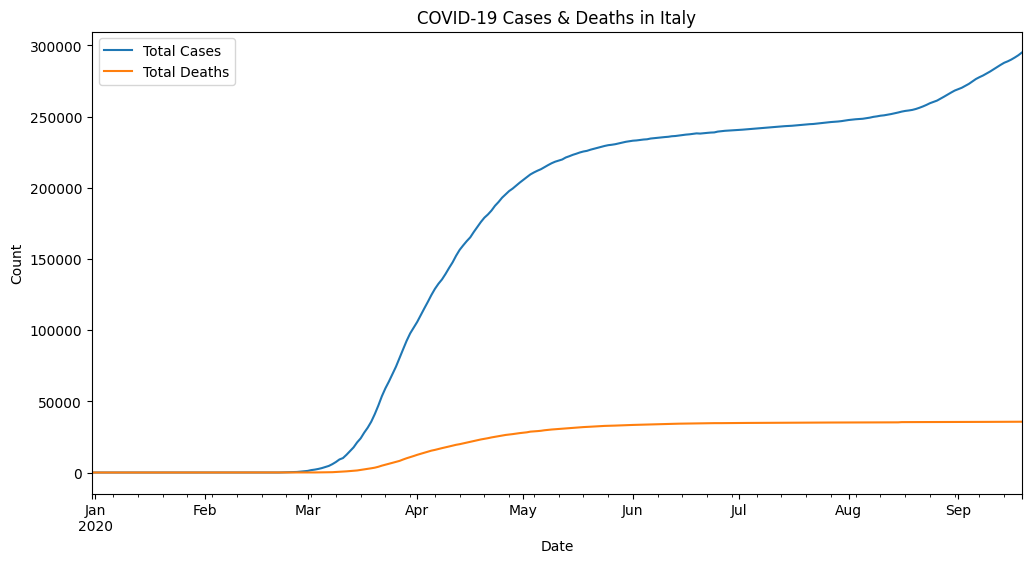

In [63]:
df_country = df_covid[df_covid["Location"] == "Italy"].sort_values("Date")

ax = df_country.set_index("Date")["Total Cases"].plot(kind="line", figsize=(12,6),
                                                      ylabel="Count", label="Total Cases",
                                                      title="COVID-19 Cases & Deaths in Italy")

df_country.set_index("Date")["Total Deaths"].plot(kind="line", label="Total Deaths", ax=ax)

ax.legend()

### **Insights from the COVID-19 Total Cases Plot: Poland vs Italy**

The line chart compares the progression of **total confirmed COVID-19 cases** between **Italy** and **Poland** over time.

- **Early Outbreak (Dec 2019 – Feb 2020):**
  - Italy reported its first cases at the end of **January 2020** (3 cases).
  - Case counts in Italy grew slowly until **late February**, when numbers began to accelerate (17 → 229 cases within a few days).

- **Rapid Growth in Italy (Feb – Mar 2020):**
  - Italy experienced an **explosive outbreak** starting in late February.
  - By **March 1st, 2020**, Italy already had over **1,000 cases**, and by mid-March it surpassed **20,000 cases**.
  - This highlights Italy as one of the earliest and hardest-hit European countries.

- **Poland’s Later Outbreak (Mar 2020 Onwards):**
  - Poland reported its first case on **March 4, 2020**.
  - Growth in Poland was **much slower** compared to Italy in the early months.
  - By the end of March, Poland had a little over **2,000 cases**, while Italy was already above **100,000 cases**.

- **Cumulative Growth Trend (Apr – Jul 2020):**
  - Italy’s case curve rose steeply through March and April, then **flattened** by summer 2020 (around **240,000 cases by July**).
  - Poland’s curve rose gradually but consistently, reaching **40,000+ cases by late July**, still far below Italy’s total.

### Key Takeaways
- Italy was hit **earlier and harder**, with a sharp exponential growth in spring 2020.
- Poland’s outbreak started **later** and followed a **slower trajectory** in comparison.
- The plot highlights how different the pandemic’s **timing and scale** were between the two countries, despite both being in Europe.

In [64]:
df_compare = df_covid[df_covid["Location"].isin(["Poland", "Italy"])]

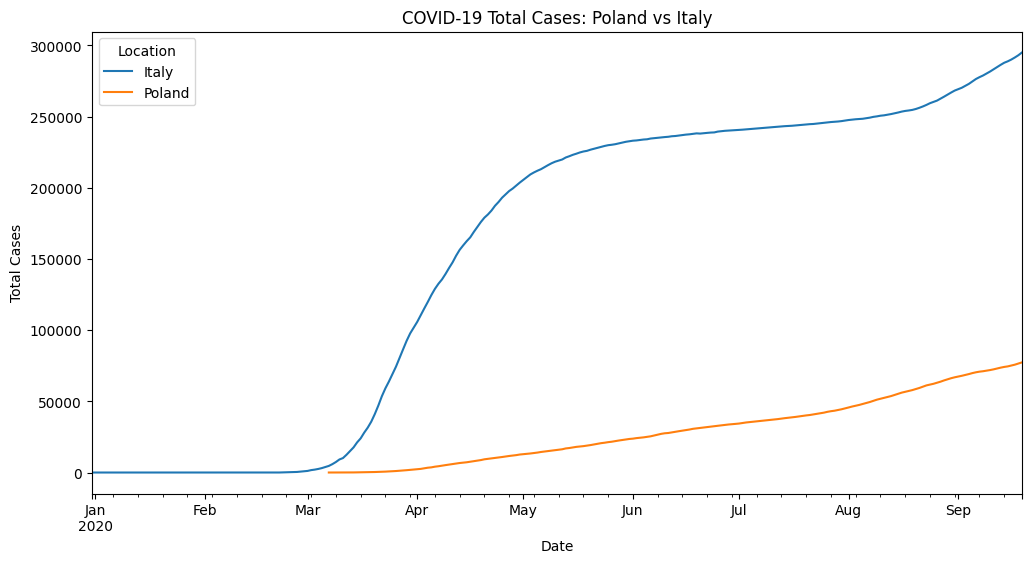

In [65]:
ax = df_compare.pivot(index="Date", columns="Location", values="Total Cases") \
               .plot(kind="line", figsize=(12,6), ylabel="Total Cases",
                     title="COVID-19 Total Cases: Poland vs Italy")

### **Insights: COVID-19 Total Deaths – Poland vs Italy**

This line chart compares the cumulative COVID-19 deaths in **Italy** and **Poland** from the start of the pandemic.  

- **Italy’s trajectory**:  
  - Deaths remained at zero until **late February 2020**.  
  - The first spike appeared on **Feb 23, 2020**, followed by a **sharp exponential rise** throughout March.  
  - Italy quickly became one of the earliest and hardest-hit countries in Europe, surpassing **10,000 deaths by late March**.  
  - Growth continued steeply into April, but by May–June the curve began to **flatten**, showing that daily deaths slowed down.  
  - By **August 2020**, Italy’s total deaths stabilized around **35,000**, with only small increases afterward.  

- **Poland’s trajectory**:  
  - Poland reported its first deaths later, in **mid-March 2020**.  
  - The growth was **slower and more gradual** compared to Italy.  
  - By the end of May, Poland had just over **1,000 deaths**, while Italy already exceeded **30,000**.  
  - The curve kept climbing steadily, but never approached Italy’s early explosive surge.  

- **Comparison**:  
  - Italy’s death toll grew dramatically in the first months, while Poland’s remained relatively lower and more controlled in the same period.  
  - The stark difference highlights how Italy was one of Europe’s epicenters early in the pandemic, while Poland experienced a **delayed and slower spread**.  

**Takeaway**: Italy faced a severe and early outbreak with rapid escalation in deaths, while Poland’s curve shows a later start and slower growth, reflecting differences in timing, health policies, and possibly population exposure.  

<Axes: title={'center': 'COVID-19 Total Deaths: Poland vs Italy'}, xlabel='Date', ylabel='Total Deaths'>

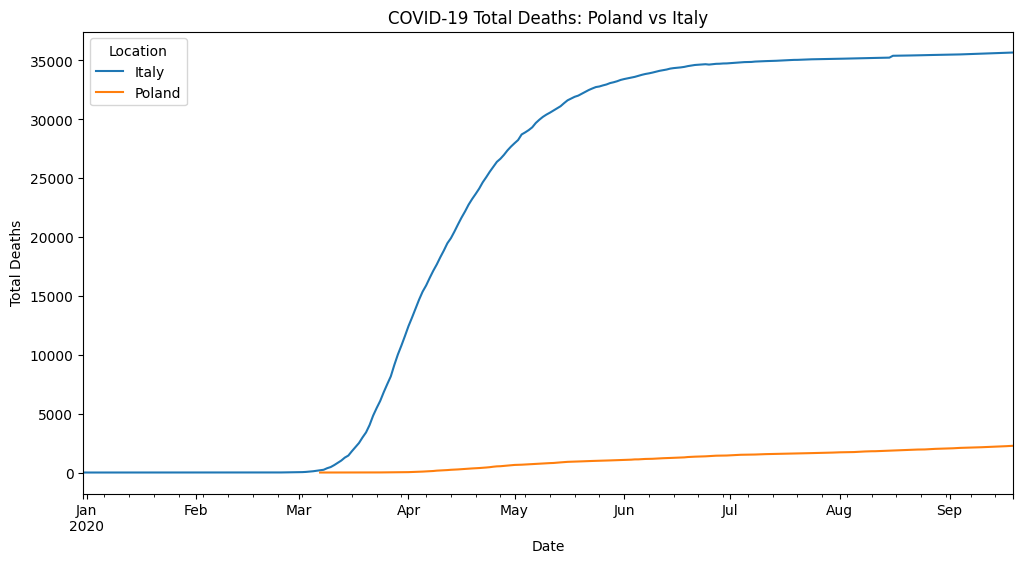

In [66]:
df_compare.pivot(index="Date", columns="Location", values="Total Deaths") \
          .plot(kind="line", figsize=(12,6), ylabel="Total Deaths",
                title="COVID-19 Total Deaths: Poland vs Italy")

### **Top Countries by Total COVID-19 Cases and Deaths**

To understand the **global impact of COVID-19**, we calculate the **maximum total cases and deaths per country** (excluding the aggregated "World" row). Key insights:  

- Identifying the **top affected countries** provides context for where the pandemic had the most severe health outcomes.  
- Comparing **cases vs deaths** highlights differences in **infection spread versus mortality**, which can reflect **healthcare quality, population size, and reporting practices**.  
- This analysis sets the stage for **bar chart visualizations**, which make it easy to **compare countries at a glance**.

In [67]:
df_top = df_covid[df_covid["Location"] != "World"]

cases_per_country = df_top.groupby(["Location"])["Total Cases"].max().sort_values(ascending=False).head()
deaths_per_country = df_top.groupby(["Location"])["Total Deaths"].max().sort_values(ascending=False).head()

### **Top 5 Countries by Total COVID-19 Cases**

This horizontal bar chart highlights the countries with the **highest cumulative COVID-19 cases**. Key observations:  

- The **United States** leads by a significant margin with over **6.7 million reported cases**, followed by **India** (5.3M) and **Brazil** (4.5M).  
- **Russia** and **Peru** round out the top five, showing substantial case counts despite smaller populations compared to the U.S., India, or Brazil.  
- The wide gap between the top countries illustrates the **unequal impact of the pandemic**, influenced by factors such as:  
  - **Population size** and density  
  - **Testing capacity and reporting practices**  
  - **Government policies and public health interventions**  
- Comparing these numbers visually emphasizes **where outbreaks were most severe**, helping to identify regions that experienced the **largest burdens on healthcare systems**.  
- This plot also serves as a baseline for **further correlation analyses**, such as linking case counts with socio-economic indicators like GDP per capita or human development index.  

Overall, the visualization provides a **clear and intuitive understanding of global case distribution**.

<Axes: title={'center': 'Top 5 Countries by Total COVID-19 Cases'}, xlabel='Total Cases', ylabel='Country'>

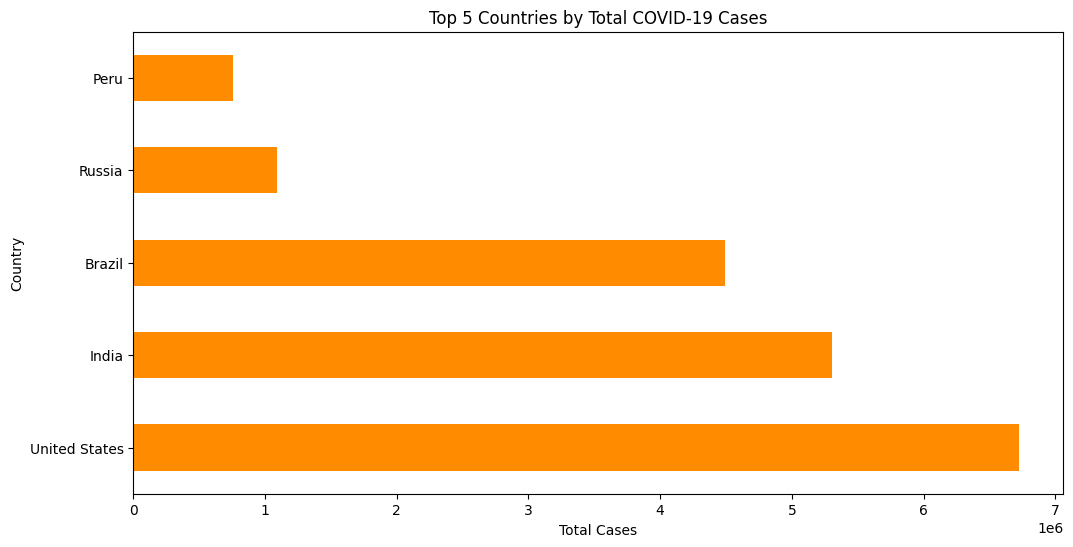

In [68]:
cases_per_country.plot(kind="barh", figsize=(12, 6), color="darkorange",
                       ylabel="Country", xlabel="Total Cases",
                       title="Top 5 Countries by Total COVID-19 Cases")

### **Top 5 Countries by Total COVID-19 Deaths**

This bar chart presents the countries with the **highest cumulative COVID-19 deaths**, offering a perspective on the **mortality impact of the pandemic**. Key insights include:  

- The **United States** experienced the most deaths with nearly **200,000 fatalities**, followed by **Brazil** (135,793) and **India** (85,619).  
- **Mexico** and the **United Kingdom** complete the top five, reflecting regions with significant healthcare challenges or high population densities.  
- Comparing this chart with the top cases chart reveals a **disparity between case numbers and deaths**:  
  - For example, India has the second-highest number of cases but fewer deaths than the U.S. and Brazil, suggesting **differences in healthcare capacity, demographics, and reporting accuracy**.  
  - Similarly, the United Kingdom appears in the top five for deaths despite lower case counts compared to countries like Peru or Russia, highlighting **regional differences in mortality rates**.  
- The visual representation makes it easy to identify countries with **severe health impacts** and can inform discussions about **public health preparedness, medical infrastructure, and pandemic management strategies**.  
- By analyzing mortality alongside case counts, we can start to explore **case-fatality rates** and the **effectiveness of government interventions and vaccination campaigns**.  

This chart emphasizes that while the number of infections is important, **mortality is a critical measure of the pandemic’s overall severity**, providing deeper insights into the **human cost of COVID-19 globally**.

<Axes: title={'center': 'Top 5 Countries by Total COVID-19 Deaths'}, xlabel='Total Deaths', ylabel='Country'>

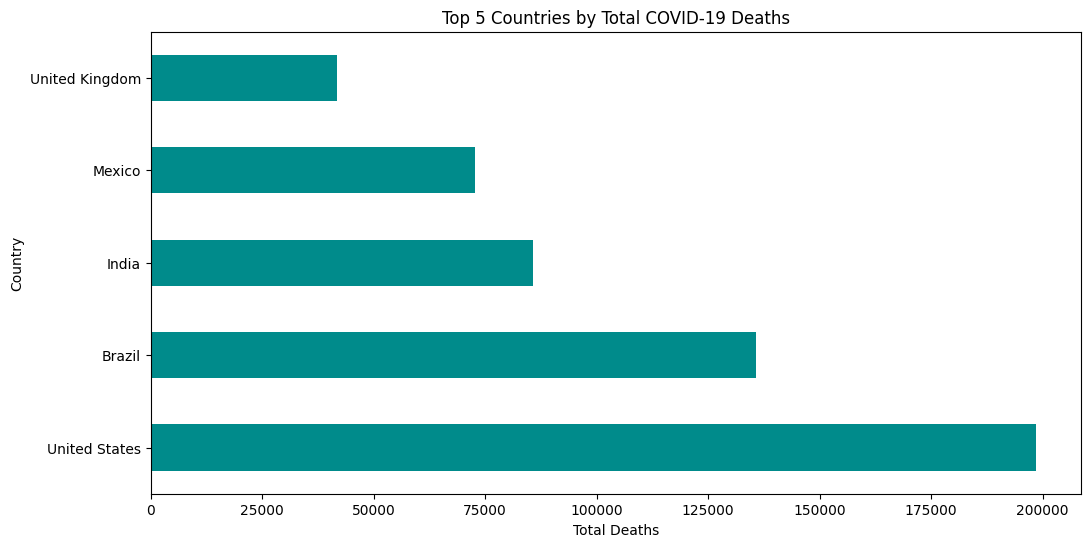

In [69]:
deaths_per_country.plot(kind="barh", figsize=(12, 6), color="darkcyan",
                       ylabel="Country", xlabel="Total Deaths",
                       title="Top 5 Countries by Total COVID-19 Deaths")

### **Top 10 Countries by COVID-19 Case Fatality Rate (CFR)**

This horizontal bar chart shows the **Case Fatality Rate (CFR)** for the ten countries with the highest mortality relative to confirmed COVID-19 cases. Key observations:

- **Yemen** stands out with a staggering **28.9% CFR**, indicating severe challenges in healthcare capacity, reporting, and pandemic management.
- European countries like **Italy (12.1%)**, **United Kingdom (10.8%)**, **Belgium (9.98%)**, and **France (7.29%)** also have high CFRs, reflecting the **impact of early pandemic waves** and high proportions of elderly populations.
- **Mexico (10.57%)** and **Ecuador (8.9%)** show that **high CFR is not limited to Europe**, suggesting **underreporting of cases, healthcare system limitations, or testing gaps**.
- Smaller territories such as **Jersey, Montserrat, and Isle of Man** appear in the top 10 due to **smaller population sizes**, where a few deaths can significantly affect the CFR.
- The chart emphasizes that **CFR varies widely across countries**, highlighting **differences in healthcare infrastructure, testing capacity, population age structure, and data reporting accuracy**.

**Insight:**  
High CFR does not always correlate with total cases, some countries may have fewer cases but proportionally higher deaths. This underscores the **importance of examining mortality rates relative to cases**, not just raw counts, to understand the true impact of COVID-19 across different regions.

<Axes: title={'center': 'Top 10 Countries by COVID-19 CFR'}, xlabel='CFR (%)', ylabel='Country'>

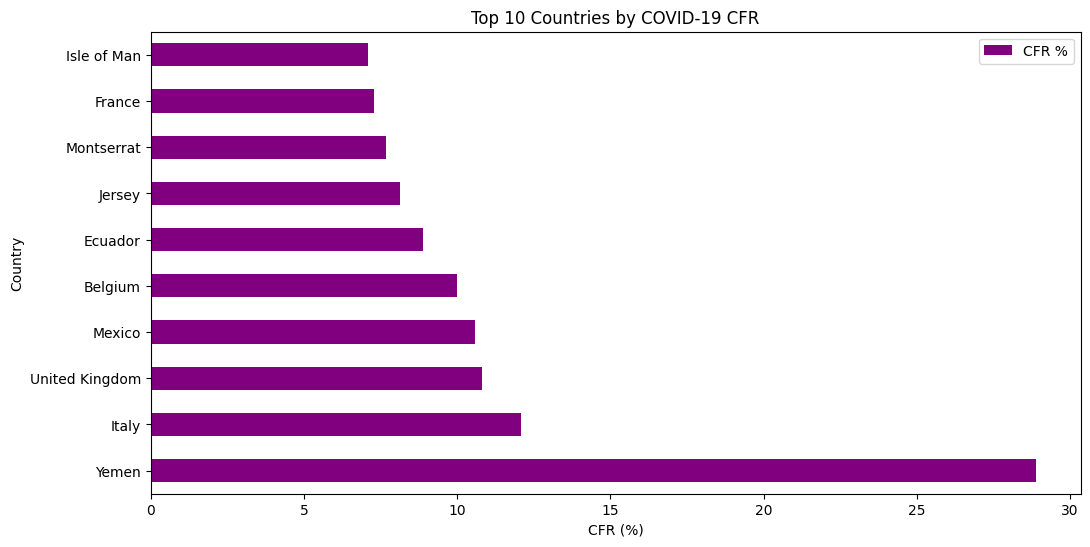

In [75]:
df_cfr.plot(kind="barh", 
                   y="CFR %",
                   color="purple", 
                   xlabel="CFR (%)", 
                   ylabel="Country",
                   figsize=(12, 6),
                   title="Top 10 Countries by COVID-19 CFR")

### **GDP per Capita vs Total COVID-19 Cases**

This scatter plot explores whether **economic wealth, measured by GDP per capita, is related to the total number of COVID-19 cases** in each country. Key observations:  

- The correlation value is **0.015**, which is extremely low, indicating **almost no linear relationship** between a country's GDP per capita and its total case count.  
- High-income countries like the **United States** and **Western European nations** reported high case numbers, but several middle- or low-income countries also experienced significant outbreaks.  
- The scatter plot shows a **wide spread of case counts across all income levels**, suggesting that **economic wealth alone does not determine the scale of infection**.  
- This finding highlights the role of other factors in pandemic spread, including:  
  - **Population density** and urbanization  
  - **Testing availability and reporting accuracy**  
  - **Government interventions, social behavior, and mobility patterns**  
- Although richer countries may have better healthcare infrastructure, **they were not immune to large outbreaks**, possibly due to more international travel and greater social interaction.  
- This analysis emphasizes that **pandemic outcomes are multi-factorial**, and economic strength alone is not a predictor of total cases.  

The visualization effectively conveys that **COVID-19 spread was global and indiscriminate**, challenging assumptions that wealthier nations would automatically see fewer infections.

<Axes: title={'center': 'GDP per Capita vs Total COVID-19 Cases'}, xlabel='GDP per Capita', ylabel='Total Cases'>

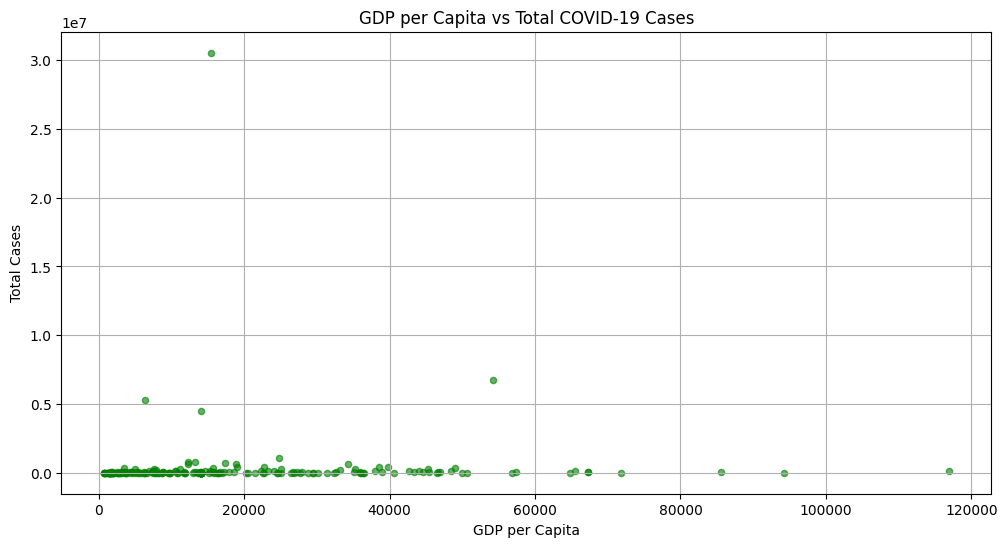

In [71]:
df_latest.plot(kind="scatter", figsize=(12, 6), alpha=0.6, color="green",
               x="Gdp Per Capita", y="Total Cases", grid=True,
               xlabel="GDP per Capita", ylabel="Total Cases",
               title="GDP per Capita vs Total COVID-19 Cases")

### **Human Development Index vs Total COVID-19 Deaths**

This scatter plot examines the relationship between a country's **Human Development Index (HDI)** and the **total number of COVID-19 deaths**. Key insights include:

- The correlation between HDI and total deaths is approximately **0.061**, which is very weak, indicating **almost no linear relationship** between HDI and mortality.  
- Interestingly, countries with **high HDI** like the United States, United Kingdom, and Western European nations still reported **substantial death counts**, suggesting that **better development does not fully prevent fatalities**.  
- Some lower-HDI countries recorded fewer deaths, which could be influenced by **underreporting, lower testing rates, or younger population demographics**.  
- The scatter plot shows a **wide distribution**, with deaths occurring across the entire HDI spectrum, reinforcing that **pandemic outcomes are influenced by multiple factors** beyond HDI alone:  
  - **Healthcare system capacity and quality**  
  - **Government response measures** (lockdowns, vaccination campaigns)  
  - **Population age structure and comorbidities**  
  - **Data reporting and reliability**  
- Overall, the visualization highlights that **HDI provides limited predictive power for COVID-19 mortality**, emphasizing the complex nature of pandemic vulnerability.

This analysis suggests that while **HDI reflects socio-economic and healthcare advantages**, it does not guarantee lower death rates during a global health crisis.

<Axes: title={'center': 'HDI vs Total COVID-19 Deaths'}, xlabel='Human Development Index', ylabel='Total Deaths'>

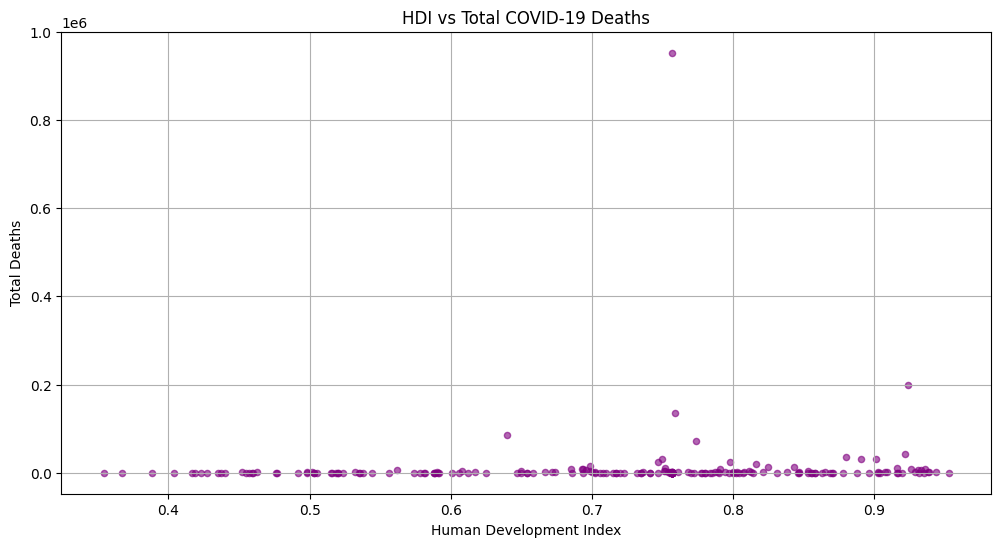

In [72]:
df_latest.plot(kind="scatter", figsize=(12, 6), alpha=0.6, color="purple",
               x="Human Development Index", y="Total Deaths", grid=True,
               xlabel="Human Development Index", ylabel="Total Deaths",
               title="HDI vs Total COVID-19 Deaths")

---

## **Conclusion and Key Learnings from the COVID-19 Analysis Project**

### Summary of the Project
This project analyzed the **OWID COVID-19 dataset** to explore patterns in **cases, deaths, and socio-economic indicators** across countries. Through data cleaning, processing, and visualizations, we investigated the **pandemic’s progression in specific countries**, identified the **most affected nations**, and examined how **economic and development factors correlate with COVID-19 outcomes**.

### Key Outcomes and Insights

1. **COVID-19 Cases and Deaths Over Time in Poland**  
   - Cumulative **cases grew rapidly**, while **deaths remained comparatively low**, showing a clear gap between infections and fatalities.  
   - The nearly flat initial deaths indicate **minimal mortality during early waves**, with gradual increases as the pandemic progressed.  
   - This time-series visualization highlighted **periods of peaks and plateaus**, which can be linked to **policy changes, vaccination rollouts, and variant emergence**.  

2. **Top 5 Countries by Total COVID-19 Cases and Deaths**  
   - The **United States, India, and Brazil** recorded the highest cases, while the **U.S., Brazil, and India** also led in deaths, though with differing ranks.  
   - Disparities between cases and deaths emphasize **differences in healthcare capacity, demographic factors, and reporting accuracy**.  
   - These charts help identify countries where the pandemic **placed the greatest strain on healthcare systems**, providing context for global public health preparedness.

3. **GDP per Capita vs Total COVID-19 Cases**  
   - The extremely low correlation (~0.015) indicates that **economic wealth alone did not determine the spread of the virus**.  
   - High and middle-income countries alike experienced significant outbreaks, suggesting that **population density, mobility, testing, and social behavior** played larger roles.  
   - This insight reinforces that **pandemic outcomes are multifactorial**, and wealth does not automatically confer immunity from large-scale infections.

4. **Human Development Index vs Total COVID-19 Deaths**  
   - The weak correlation (~0.061) highlights that **HDI has limited predictive power for mortality outcomes**.  
   - Countries with high HDI still experienced substantial deaths, while some lower-HDI countries had fewer deaths, likely due to **demographics, reporting discrepancies, or healthcare practices**.  
   - This emphasizes that **mortality is shaped by a combination of healthcare quality, government response, and population characteristics**, not just development indicators.

### Lessons Learned
- **Pandemic impact is uneven**: Total cases and deaths vary widely across countries, showing the importance of **localized analysis**.  
- **Socio-economic indicators are not sole predictors**: Both GDP and HDI have minimal correlation with cases or deaths, highlighting the **complexity of real-world pandemic dynamics**.  
- **Visualizations enhance understanding**: Time-series, bar charts, and scatter plots revealed patterns not immediately obvious in raw data, helping identify **trends, outliers, and global disparities**.  
- **Data-driven insights inform decisions**: Understanding case and death distributions can guide **public health strategies, resource allocation, and policy interventions** in future health crises.

### Conclusion
This project demonstrates that **COVID-19 outcomes cannot be explained by a single factor**. The combination of **epidemiological data, socio-economic context, and time-series analysis** provides a clearer picture of the pandemic's global impact. Ultimately, this analysis highlights the **critical role of data visualization and interpretation** in understanding complex public health challenges and preparing for future crises.
